**Описание того, что мне известно о показателе GINI (в задаче классификации)**

GINI метрика используемая для определения качества классификационной модели.

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF
np.random.seed(10)

# Привычиное определение GINI

Обычно GINI определяют через <a href="https://github.com/Dranikf/knowledge_bank/blob/main/classification_task/CAP/CAP.ipynb">CAP кривую</a>.<br>
GINI для некоторой модели, это отношение площадие между CAP кривой модели и случайной CAP кривой к площади между идеальной CAP и случайной CAP.

Покажем на рисунке:

In [24]:
plot_data.query("y == 0")["p_hat"].describe()

count    490.000000
mean       0.656849
std        0.242903
min        0.018674
25%        0.474934
50%        0.712939
75%        0.853142
max        0.998639
Name: p_hat, dtype: float64

In [23]:
plot_data.query("y == 1")["p_hat"].describe()

count    510.000000
mean       0.333626
std        0.243698
min        0.001760
25%        0.122688
50%        0.286265
75%        0.525637
max        0.910402
Name: p_hat, dtype: float64

In [56]:
plot_data.sort_values("p_hat", ascending = False)

,p_hat,y,CAP_Y
4,0.892947,1,1.0
1,0.708148,0,0.5
0,0.550798,1,0.5
3,0.510828,0,0.0
2,0.290905,0,0.0


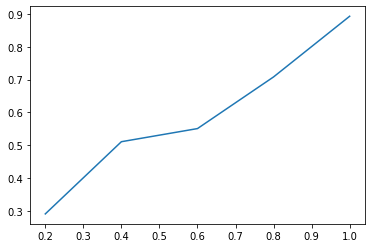

In [55]:
plot_ss = 5

np.random.seed(3)
random_range = np.random.rand(plot_ss)

plot_data = pd.DataFrame({
    "p_hat" : random_range,
    "y" : map(
        lambda r_val: np.random.choice(
            [0, 1], p = [1 - r_val, r_val]
        ), 
        random_range
    )
})

plot_data["CAP_Y"] = \
ECDF(
    plot_data.query("y == 1")["p_hat"]
)(
    plot_data["p_hat"]
)

plt.plot(
    pd.Series(range(1, plot_ss + 1))/plot_ss,
    plot_data["p_hat"].sort_values()
)

# GINI через ROC